In [2]:
import sys
sys.path.insert(0, "../../../../../Projects/Others/GitHub/UPerNet/")

import matplotlib.pyplot as plt
from utils import *
import cv2
import numpy as np
from dataloader import CitySpaceDataset
from dataloader import Transforms
import random

In [2]:
data_hyp= {
  'data_aug_shear': 0.0,
  'data_aug_translate': 0.0,
  'data_aug_degree': 0,
  "data_aug_perspective_p": 0., 
  'data_aug_prespective': 0.0,
  'data_aug_hsv_p': 0.0,
  'data_aug_hsv_hgain': 0.0,
  'data_aug_hsv_sgain': 0.,
  'data_aug_hsv_vgain': 0.,
  'data_aug_fliplr_p': 0.,
  'data_aug_flipud_p': 0.0,
  'data_aug_fill_value': 114,
  'data_aug_cutout_p': 0.0, 
  "data_aug_blur_p": 0., 
  "data_aug_saturation_p": 0., 
  "data_aug_crop_p": 0., 
  "data_aug_brightness_p": 0.}

In [3]:
trans = Transforms(data_hyp)
dataset_kwargs = {"img_dir": "../../../../../Dataset/Segmentation/cityscapes/image/train/", 
                  "seg_dir": "../../../../../Dataset/Segmentation/cityscapes/label/train/", 
                  "img_size": [768, 768], 
                  "enable_data_aug": True, 
                  "transform":trans
                }

dataset = CitySpaceDataset(**dataset_kwargs)

In [4]:
img, seg, i = dataset[9]
print(img.shape, seg.shape)

(1024, 2048, 3) (1024, 2048, 1)


In [5]:
def debug_plot(img, seg, show_label=14):
    fig, axes = plt.subplots(1, 3, figsize=[16, 6])
    axes[0].imshow(img[..., ::-1])
    seg_tmp = np.zeros_like(seg)
    seg_tmp[seg == show_label] = 255
    axes[1].imshow(seg_tmp, cmap="gray")
    mask = np.zeros_like(img)
    mask[..., 0] = seg_tmp[..., 0]
    mask[..., 1] = seg_tmp[..., 0]
    mask[..., 2] = seg_tmp[..., 0]
    mask = mask / np.max(mask)
    masked_img = img.copy().astype(np.float32)
    masked_img *= mask
    masked_img = np.clip(masked_img, 0, 255).astype(np.uint8)
    axes[2].imshow(masked_img[..., ::-1])
    fig.suptitle(f"label: {show_label}")
    fig.tight_layout()
    plt.show()

(1024, 2048, 3) (1024, 2048, 1)


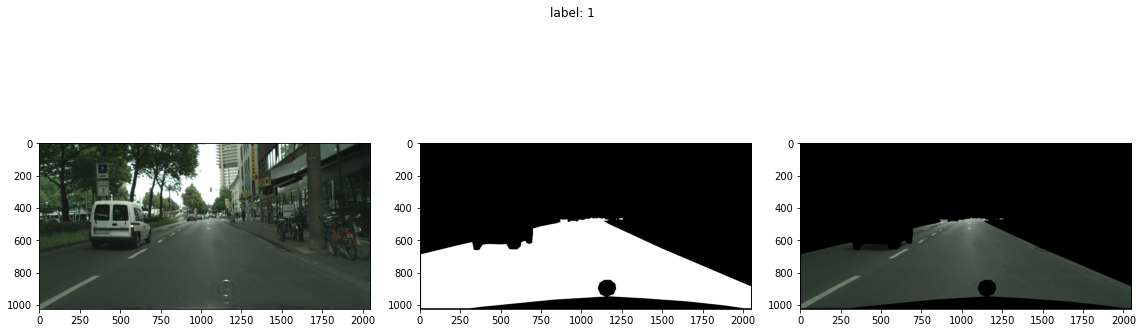

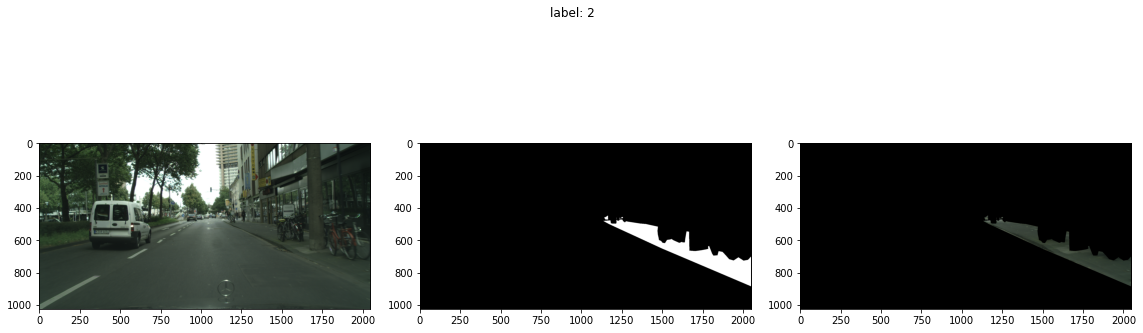

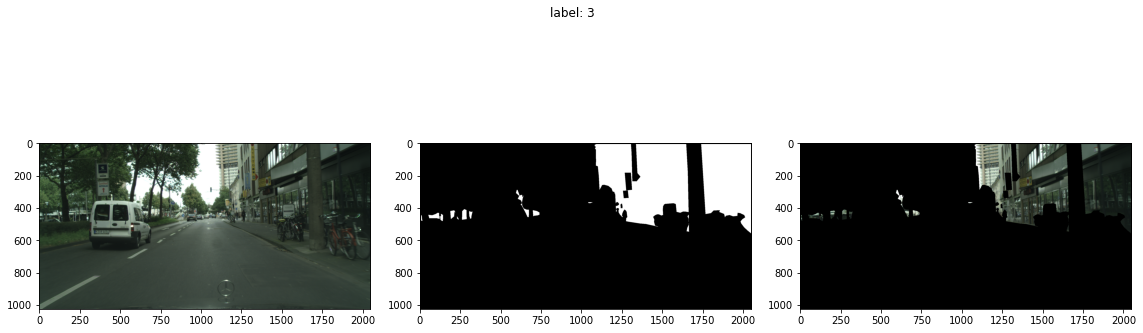

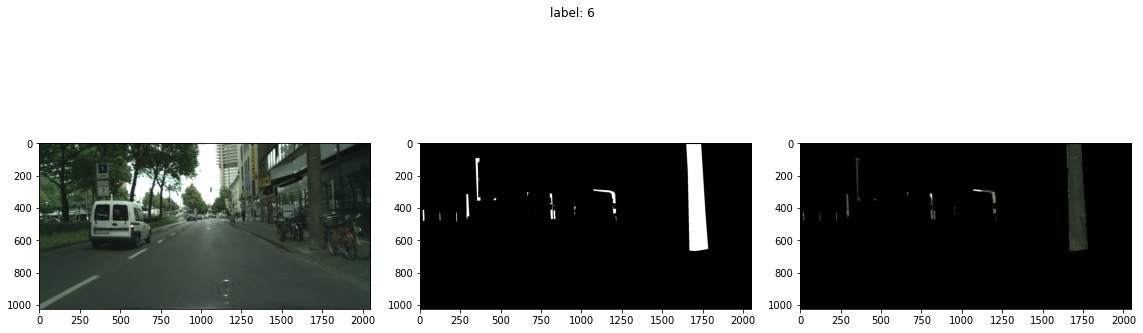

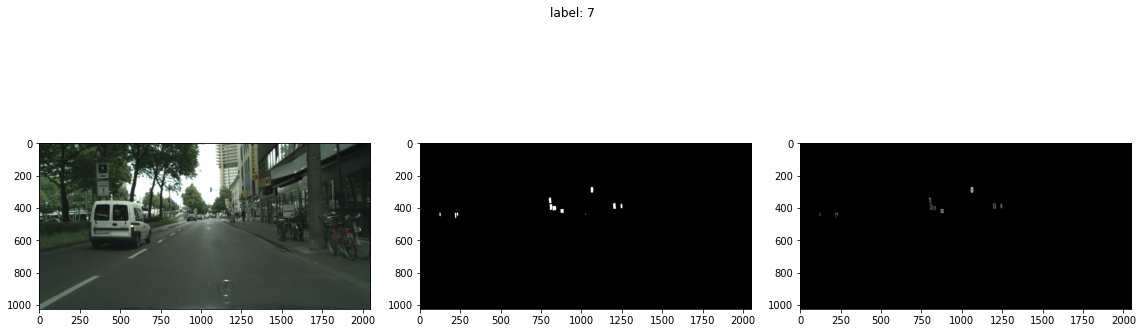

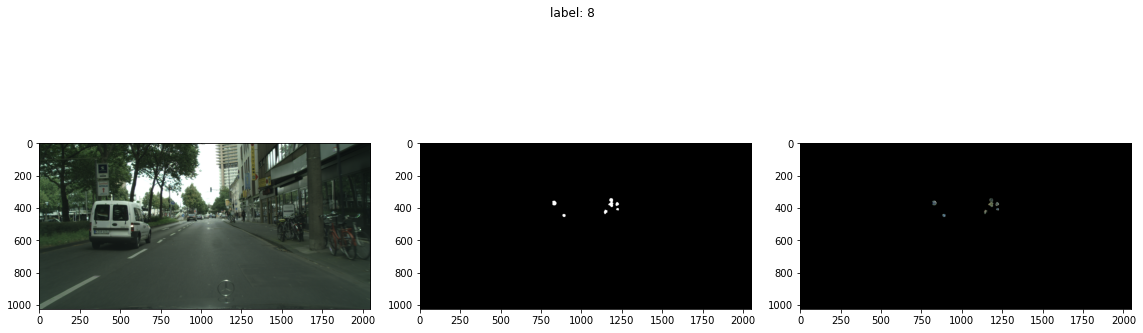

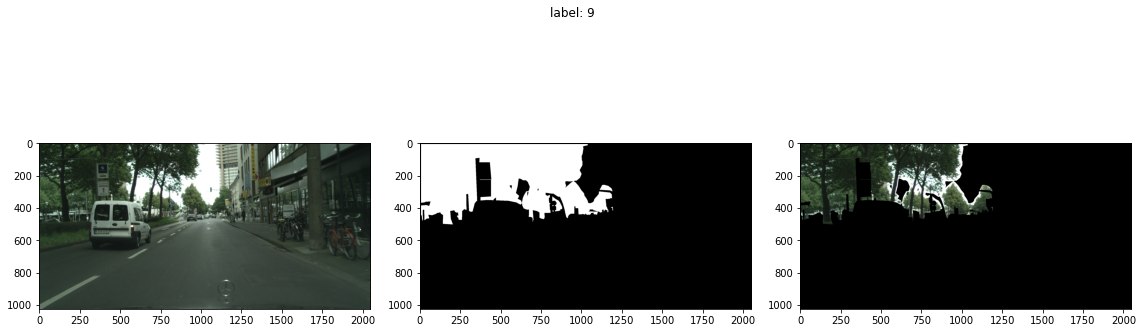

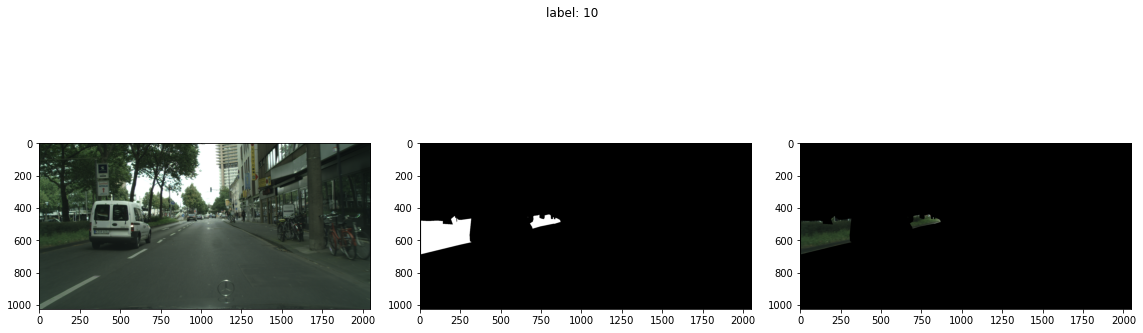

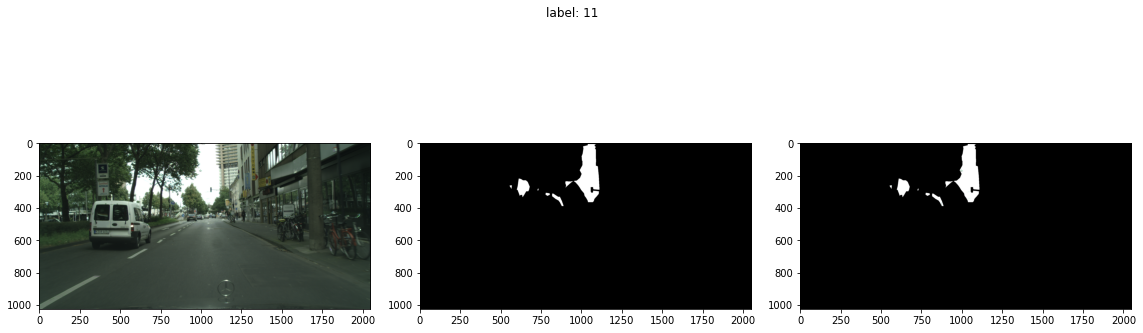

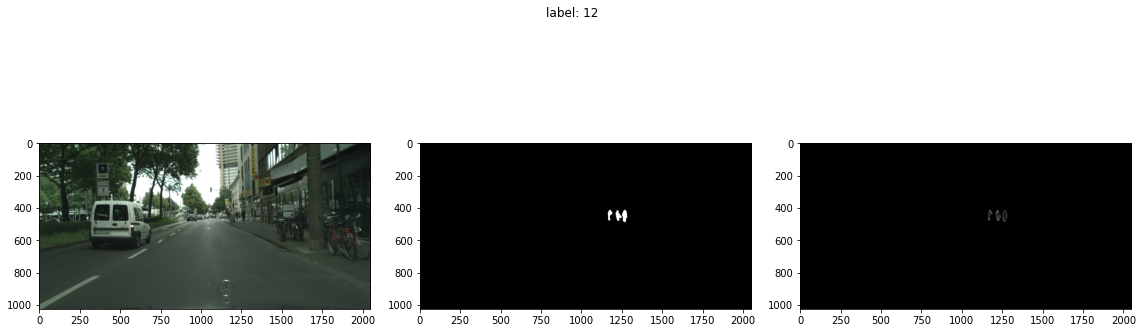

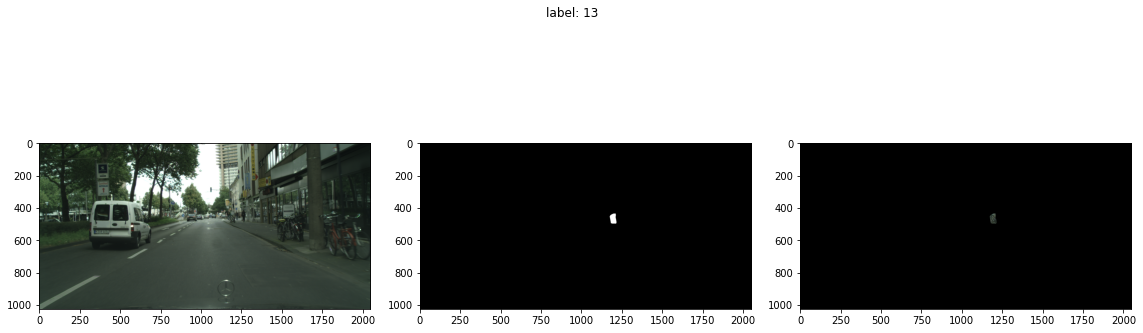

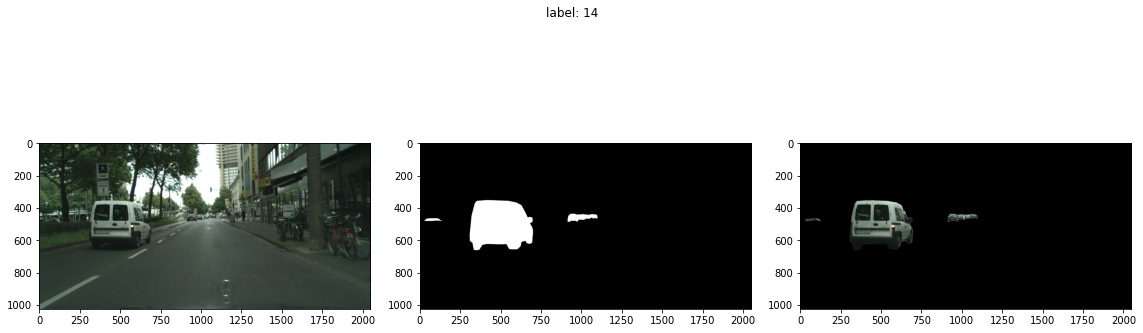

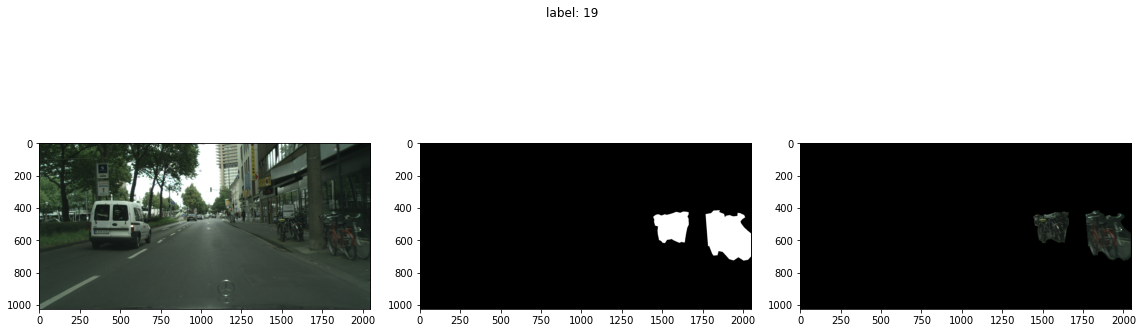

In [6]:
rnd_i = np.random.randint(0, 1000)
img, seg, i = dataset[rnd_i]
print(img.shape, seg.shape)
for lab in np.unique(seg):
    if lab != 0.0:
        debug_plot(img, seg, lab)

In [ ]:
from dataloader import build_dataloader

kwargs = {"img_dir": "../../../../../Dataset/Segmentation/cityscapes/image/train/", 
          "seg_dir": "../../../../../Dataset/Segmentation/cityscapes/label/train/", 
          "data_aug_hyp": data_hyp, 
          "enable_data_aug": False, 
          "dst_size": 768}

dataset, dataloader, prefetcher = build_dataloader(**kwargs)

torch.Size([16, 3, 768, 768]) torch.Size([16, 1, 768, 768]) 16


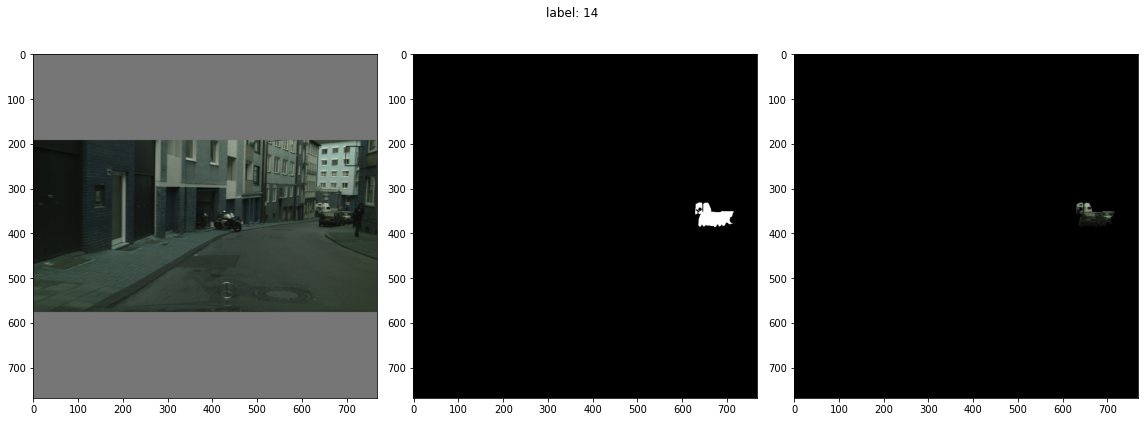

In [11]:
data = next(dataloader)

# for data in dataloader:
imgs = data['img']
segs = data['seg']
ids = data['id']
print(imgs.shape, segs.shape, len(ids))
img = np.clip(imgs.permute(0, 2, 3, 1)[1].numpy() * 255, 0, 255).astype(np.uint8)
debug_plot(img, segs.permute(0, 2, 3, 1)[1].numpy())
# break

1492


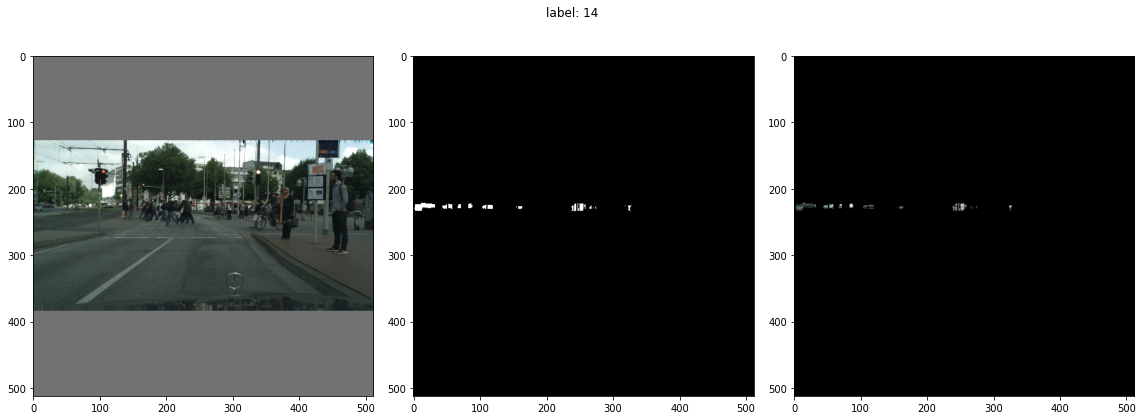

38


/home/uih/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


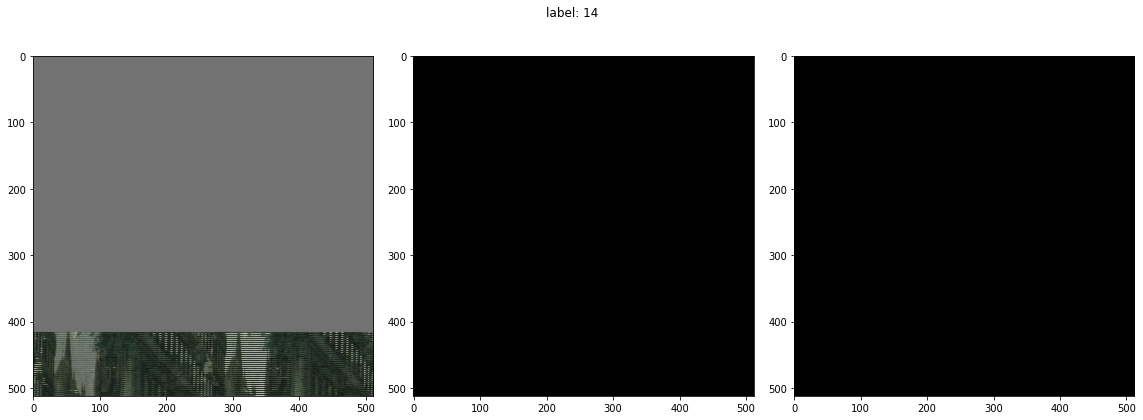

2190


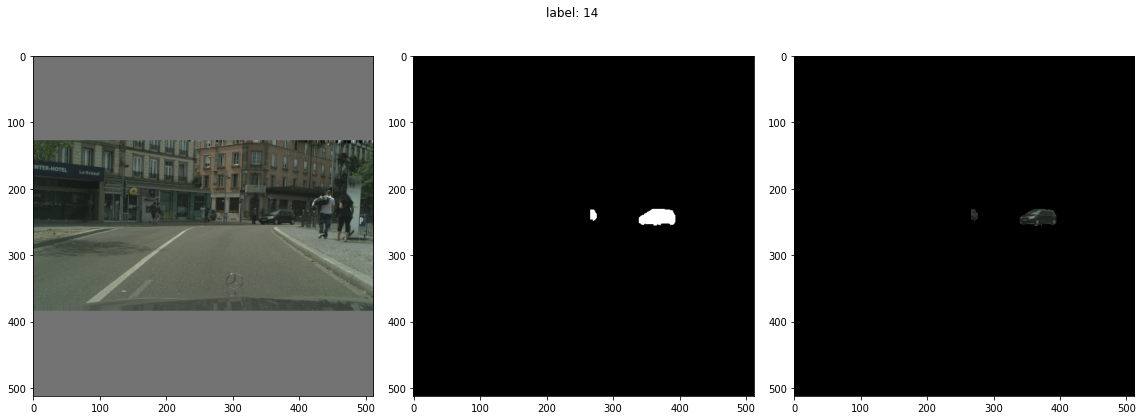

1909


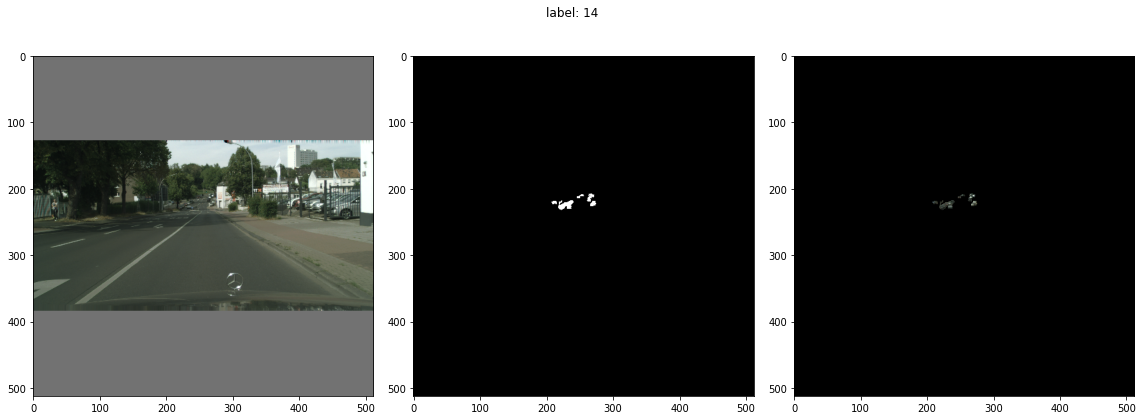

1598


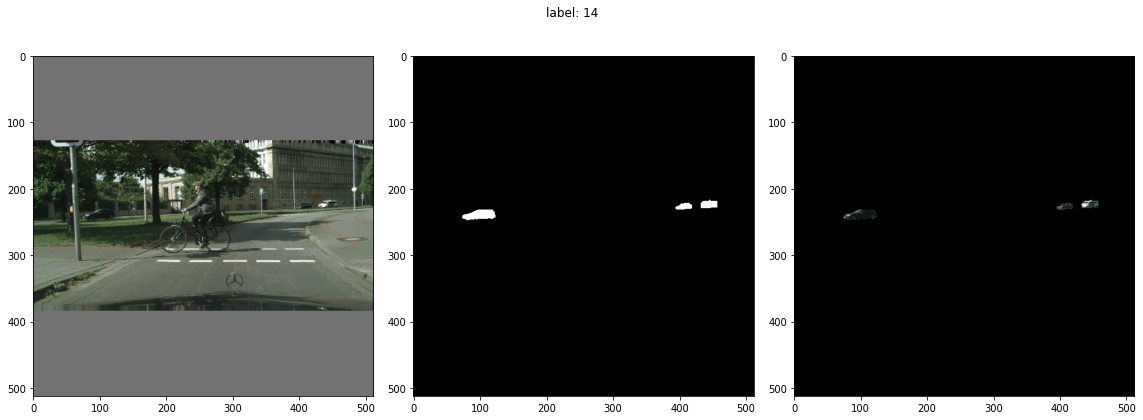

1060


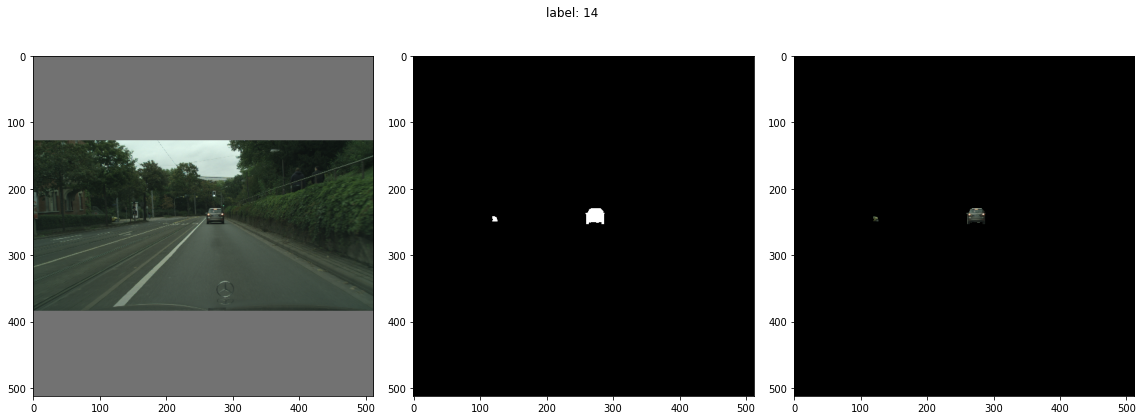

2277


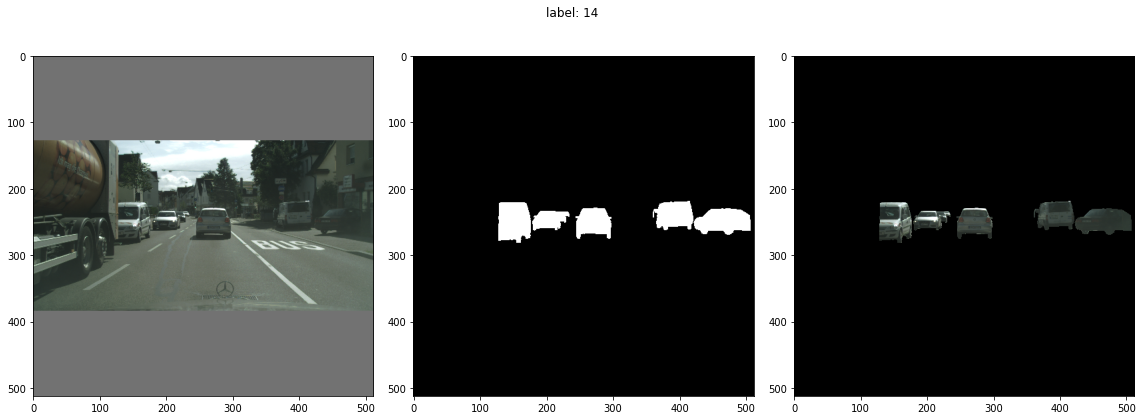

2203


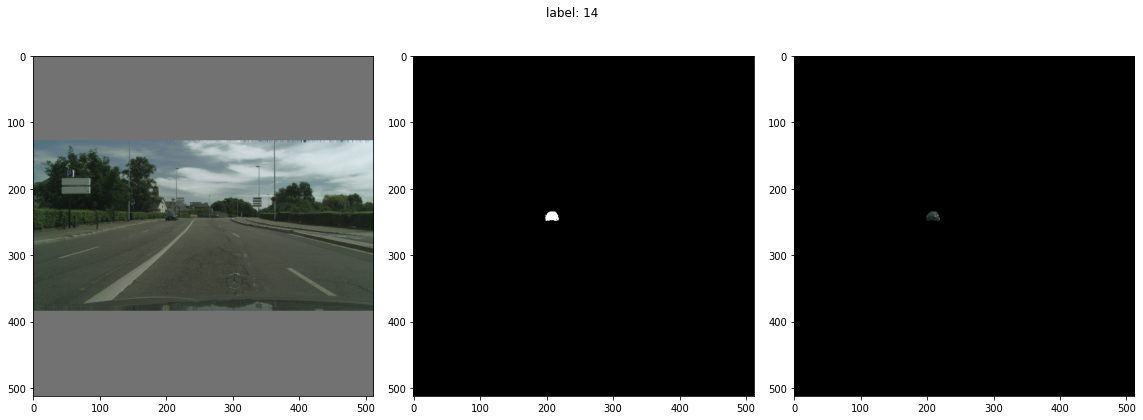

975


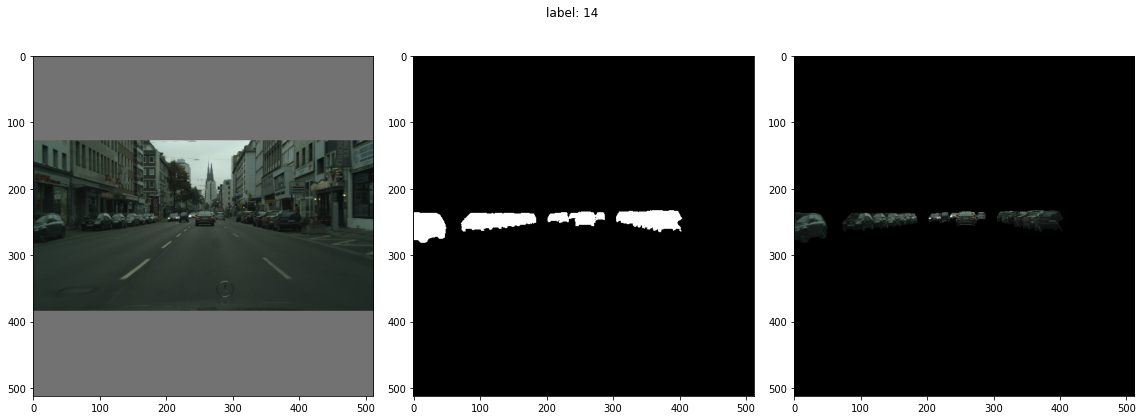

2352


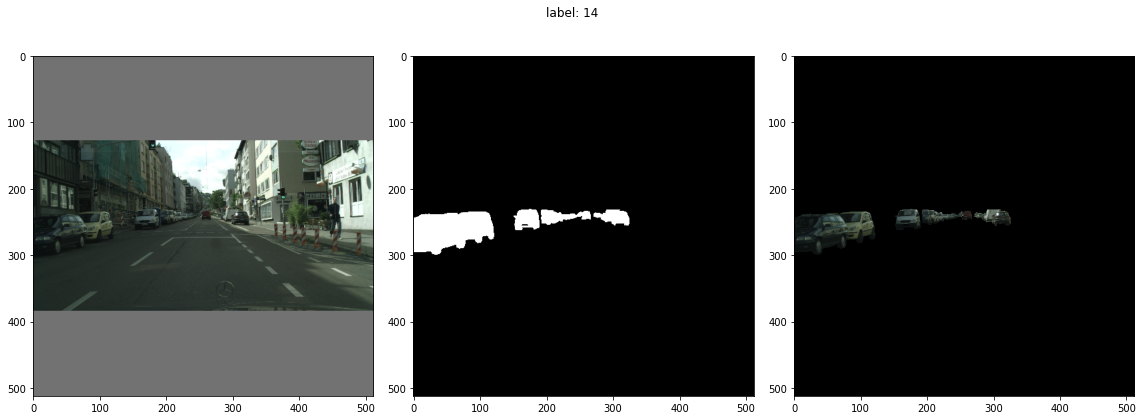

2198


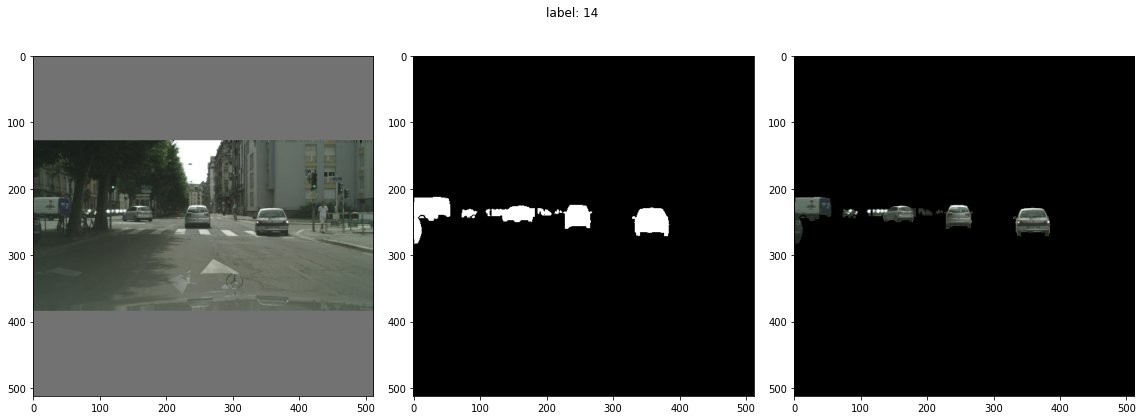

273


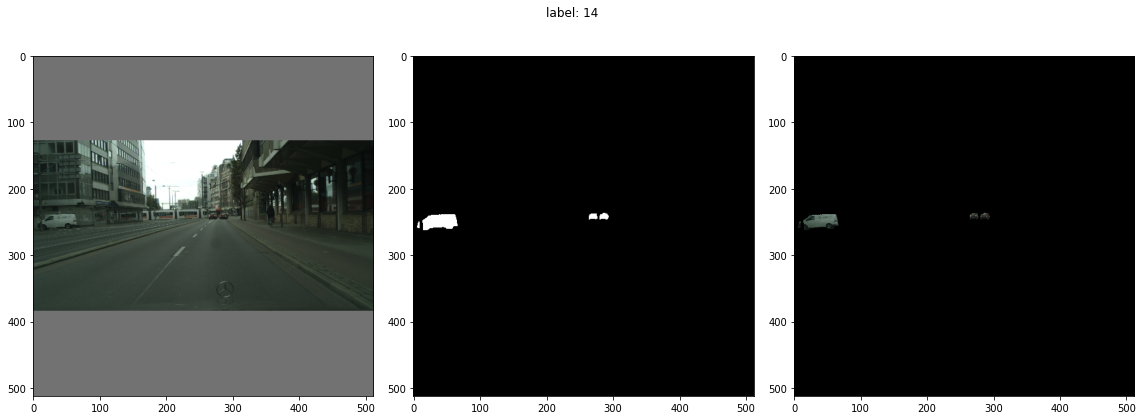

400


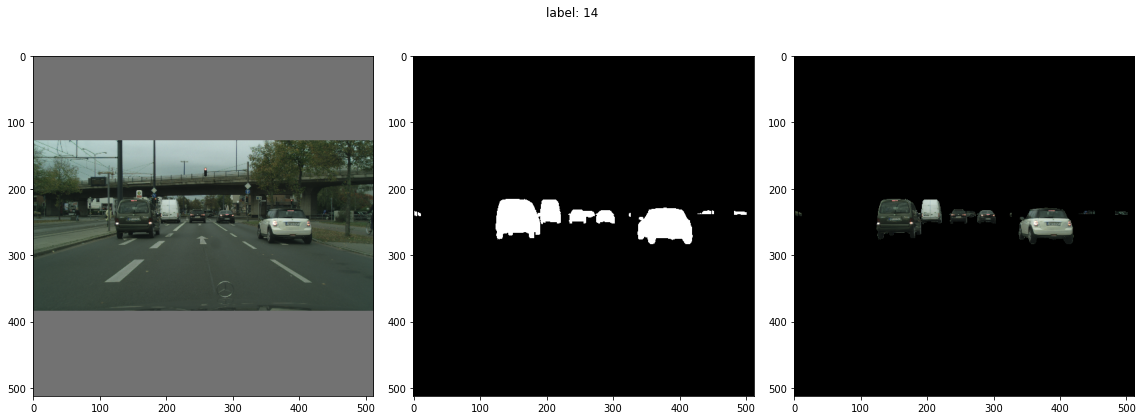

965


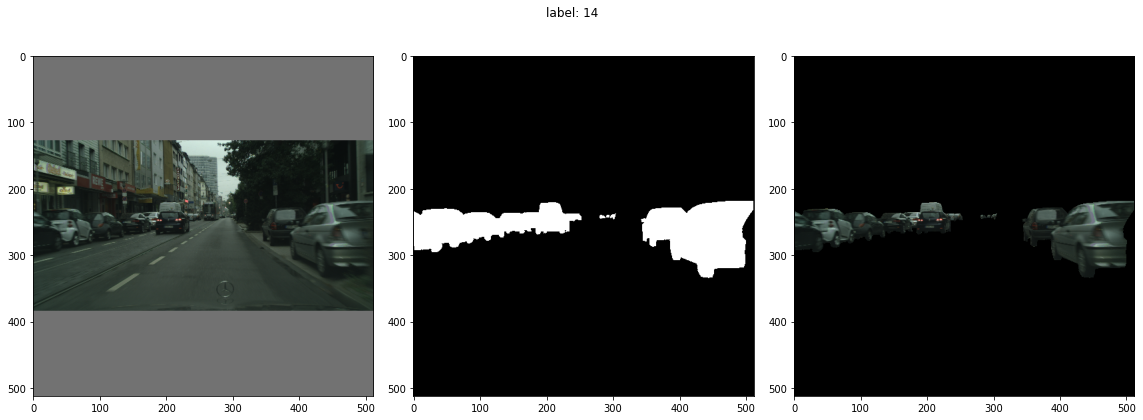

806


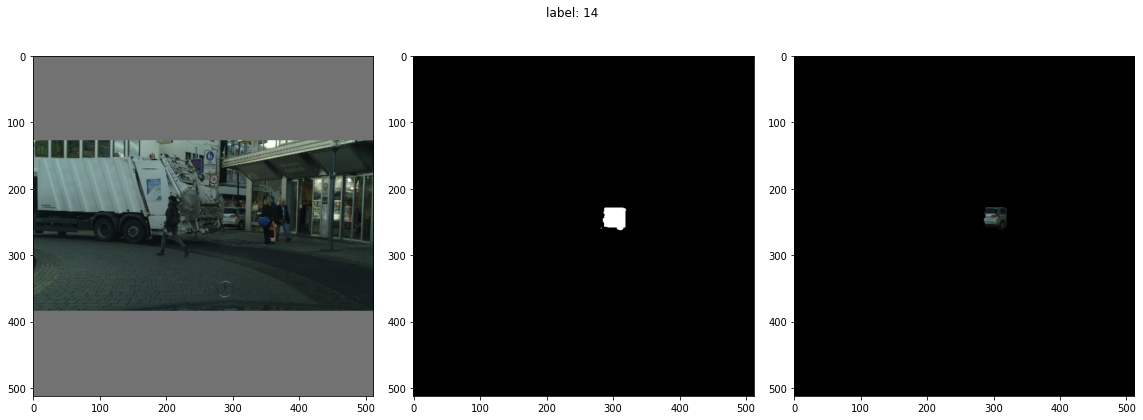

67


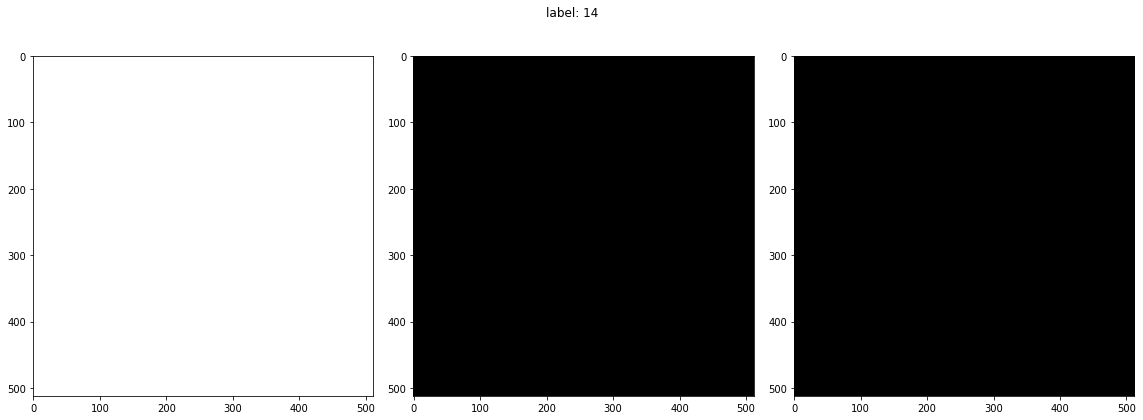

In [9]:
img_np = imgs.permute(0, 2, 3, 1).contiguous().numpy()
seg_np = segs.permute(0, 2, 3, 1).contiguous().numpy()
for i in range(len(imgs)):
    img = img_np[i]
    img = img * 255
    img = np.clip(img, 0, 255).astype(np.uint8)
    seg = seg_np[i]
    print(ids[i])
    debug_plot(img, seg)